- ### input

    Database에서 query문을 통하여 user의 id, 9개 taste Q.에 대한 response 정보
    
    request를 보낸 user의 id, 9개 taste Q.에 대한 response 정보

- ### condition

    연령대, 성별, (지역)

- ### output
    
    request를 보낸 user와 같은 cluster에 해당하는 다른 user의 id

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#### Gathering Information from DB

In [2]:
user_dict = {}
for user_id in range(100):
    taste_array = [1 if i>=0.5 else int(i*0)
                   for i in np.random.rand(9)] # fake data
    user_dict[f'user_{user_id}'] = taste_array

#### Pre-Processing

In [3]:
categories = ['food', 'beauty', 'hobby', 'social', 'economic', 'cultural']
user_score = {}
for key, value in user_dict.items():
    score_dict = {}
    score_dict[categories[0]] = sum(value[0:3])
    score_dict[categories[1]] = sum(value[3:6])
    score_dict[categories[2]] = sum(value[6:])
    score_dict[categories[3]] = value[0] + value[3] + value[6]
    score_dict[categories[4]] = value[1] + value[4] + value[7]
    score_dict[categories[5]] = value[2] + value[5] + value[8]
    user_score[key] = score_dict

In [4]:
df = pd.DataFrame(user_score).transpose()

In [5]:
df

,beauty,cultural,economic,food,hobby,social
user_0,1,2,0,1,0,0
user_1,1,2,1,1,3,2
user_2,3,2,3,3,1,2
user_3,1,1,2,1,1,0
user_4,2,2,1,1,2,2
user_5,1,2,1,2,3,3
user_6,3,1,3,2,1,2
user_7,1,1,2,2,1,1
user_8,2,2,1,2,1,2
user_9,2,2,1,2,2,3


#### Clustering

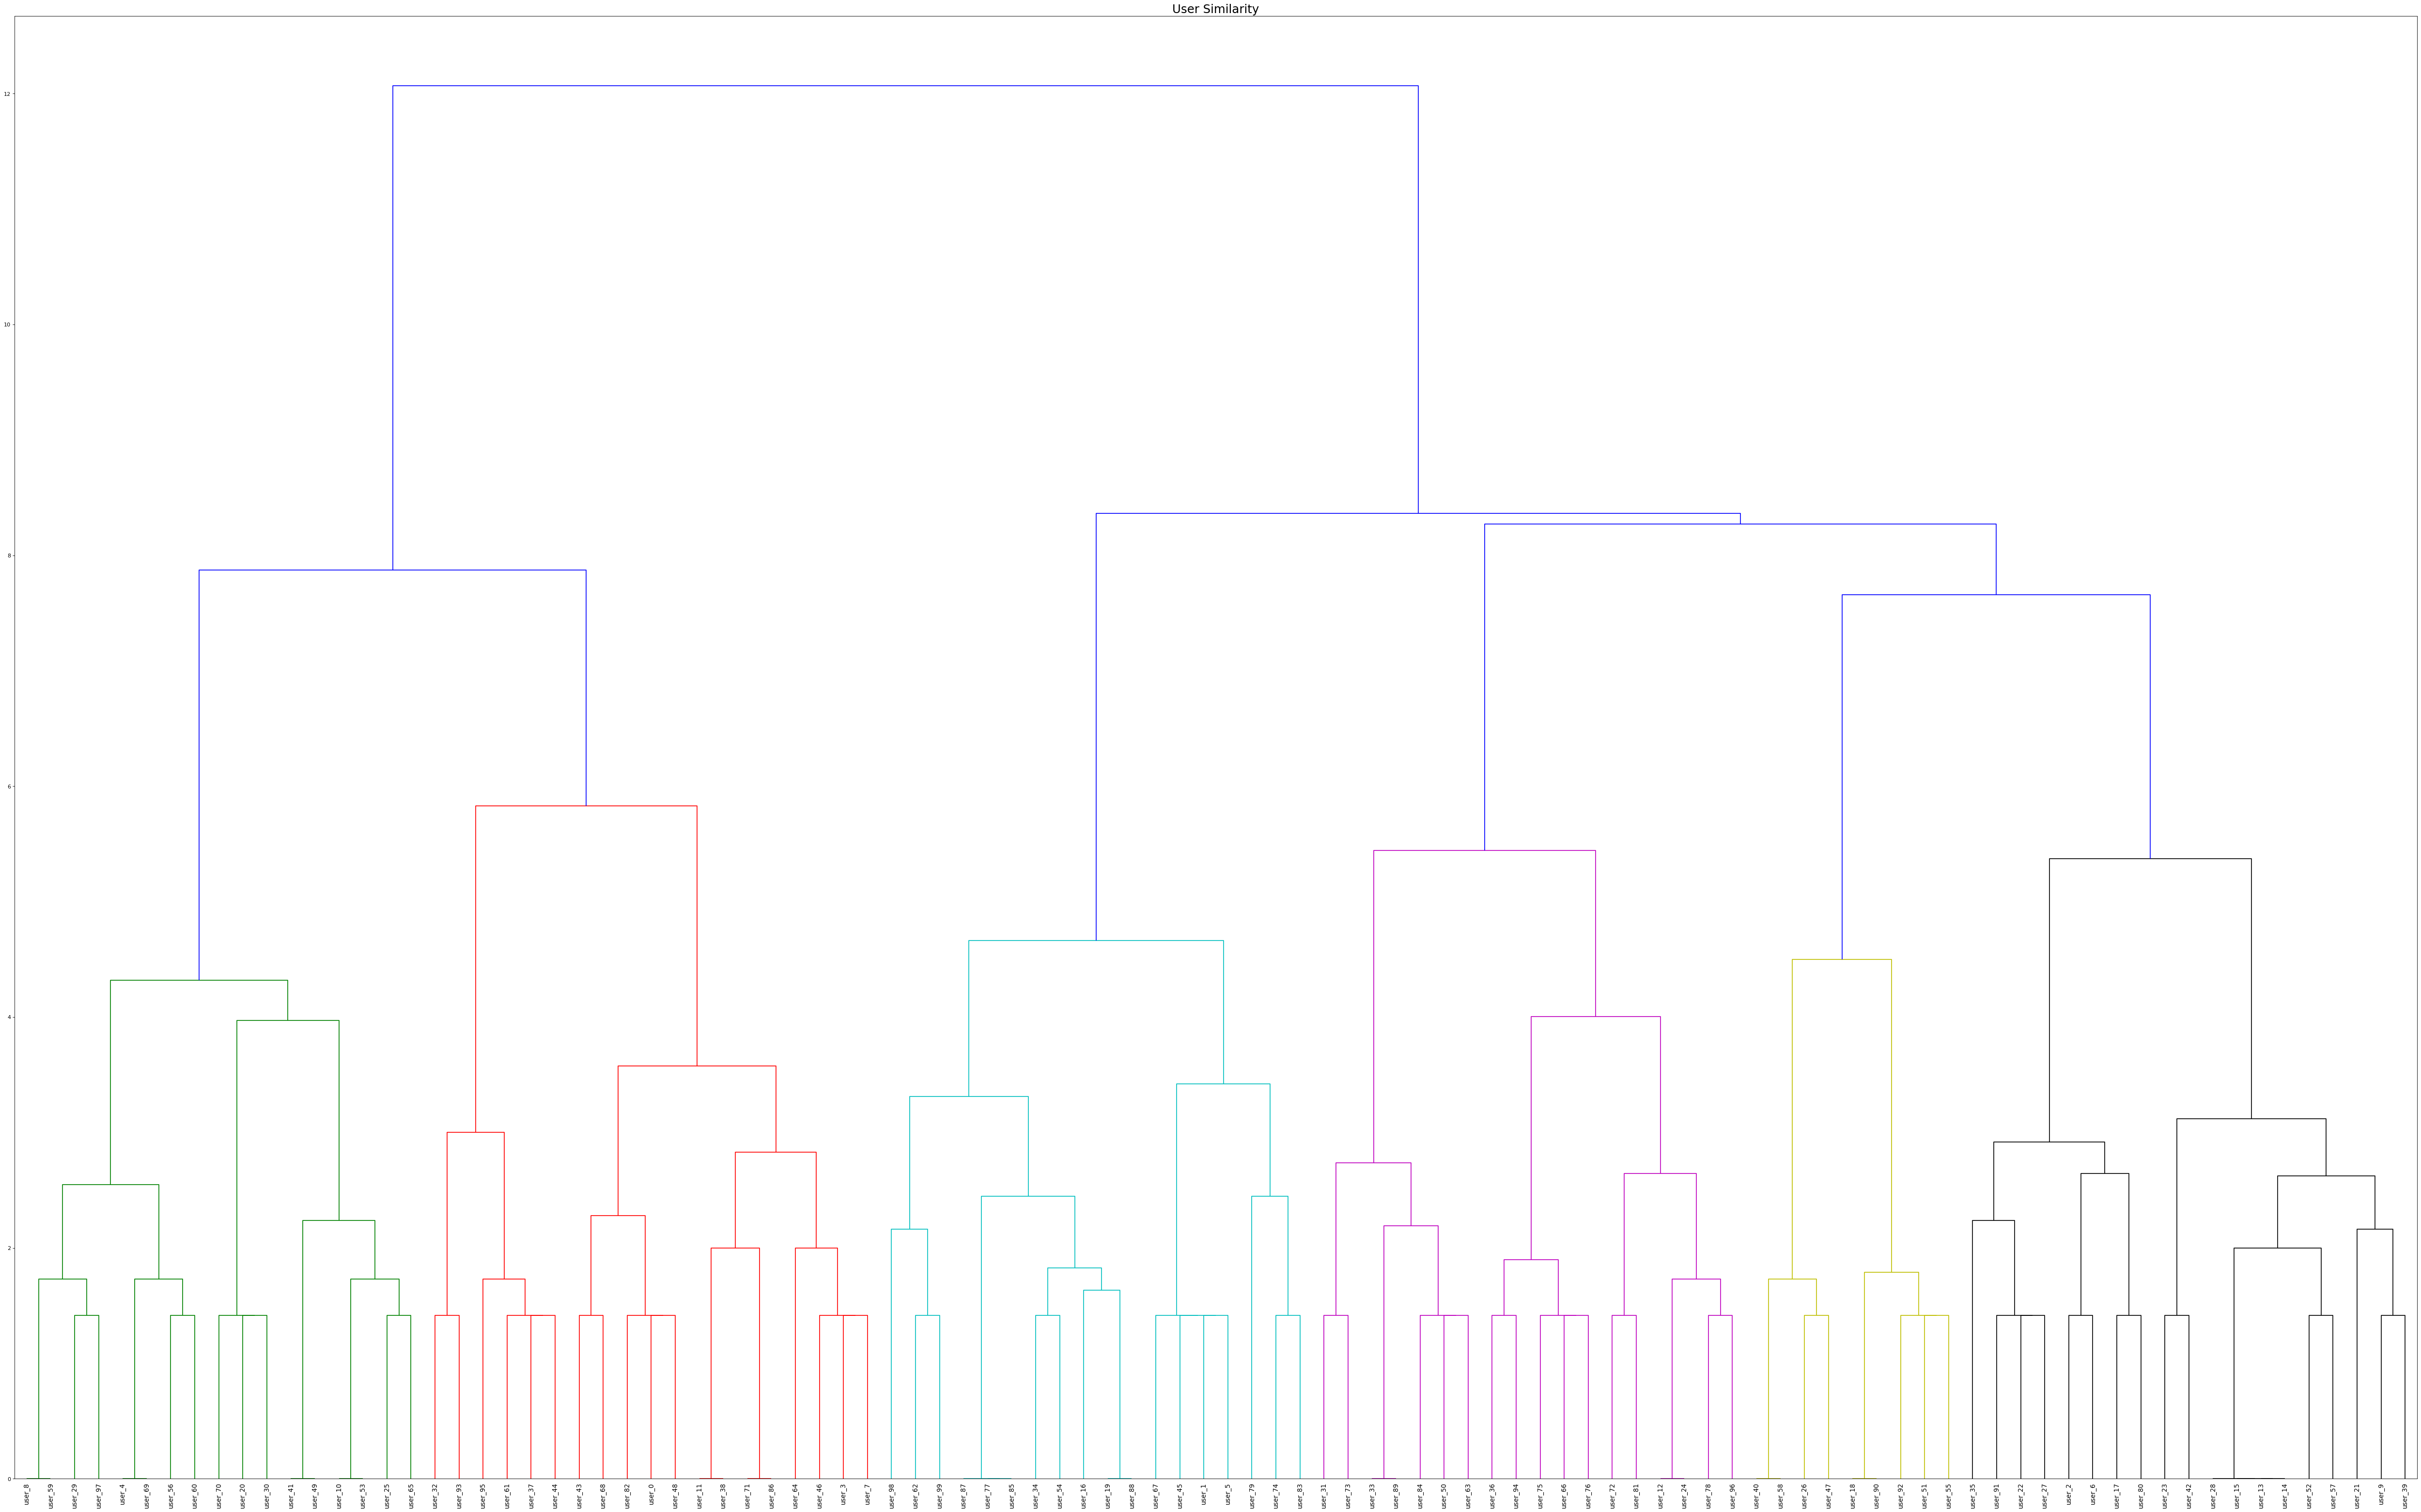

In [6]:
plt.figure(figsize=(80, 50), dpi= 80)  
plt.title("User Similarity", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['food', 'beauty', 'hobby', 'social', 'economic', 'cultural']], method='ward'), labels=df.index, color_threshold=6)  
plt.xticks(fontsize=12)
plt.show()